# Binary Classification

In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data.

Examples of classification problems include:

- Given an example, classify if it is spam or not.
- Given a handwritten character, classify it as one of the known characters.
- Given recent user behavior, classify as churn or not.

From a modeling perspective, classification requires a training dataset with many examples of inputs and outputs from which to learn.

A model will use the training dataset and will calculate how to best map examples of input data to specific class labels. As such, the training dataset must be sufficiently representative of the problem and have many examples of each class label.

There are many different types of classification algorithms for modeling classification predictive modeling problems.

There are perhaps three main types of classification tasks that you may encounter; they are:

1. Binary Classification
2. Multi-Class Classification
3. Multi-Label Classification

### Binary Classification

Binary classification refers to those classification tasks that have two class labels.
Typically, binary classification tasks involve one class that is the normal state and another class that is the abnormal state.

### Multi-Class Classification

Multi-class classification refers to those classification tasks that have more than two class labels.

Unlike binary classification, multi-class classification does not have the notion of normal and abnormal outcomes. Instead, examples are classified as belonging to one among a range of known classes.

The number of class labels may be very large on some problems. For example, a model may predict a photo as belonging to one among thousands or tens of thousands of faces in a face recognition system.

### Multi-Label Classification

Multi-label classification refers to those classification tasks that have two or more class labels, where one or more class labels may be predicted for each example.

Consider the example of photo classification, where a given photo may have multiple objects in the scene and a model may predict the presence of multiple known objects in the photo, such as “bicycle”, “apple”, “person,” etc.

This is unlike binary classification and multi-class classification, where a single class label is predicted for each example.

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
def plot_decision_boundary(X, y, clf):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
  grid = np.c_[xx.ravel(), yy.ravel()]
  probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

  f, ax = plt.subplots(figsize=(8, 6))
  contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

  ax_c = f.colorbar(contour)
  ax_c.set_label("$P(y = 1)$")
  ax_c.set_ticks([0, .25, .5, .75, 1])

  ax.scatter(X[:,0], X[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
  ax.set(aspect="equal", xlim=(x_min, x_max), ylim=(y_min, x_max), xlabel="$X_1$", ylabel="$X_2$")

## Linear Toy Dataset

In [31]:
# import dataset
df = pd.read_csv('../datasets/toy_dataset_00.csv')
# print the first rows of the dataset
df.head()

,X1,X2,Y
0,0,0,1
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0


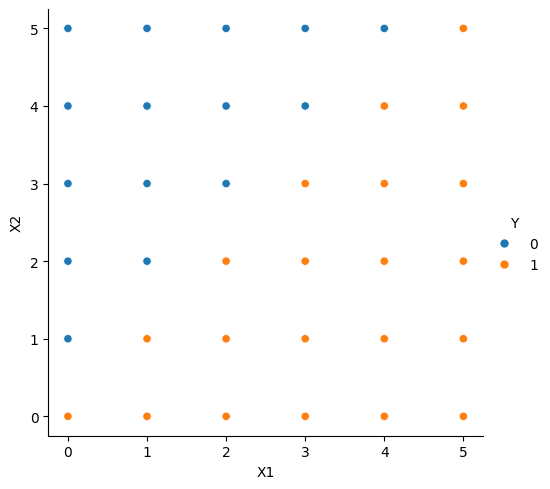

In [32]:
sns.relplot(x="X1", y="X2", hue="Y", data=df);

In [33]:
X = df[['X1', 'X2']].to_numpy()
y = df['Y'].to_numpy()

### Logistic Regression

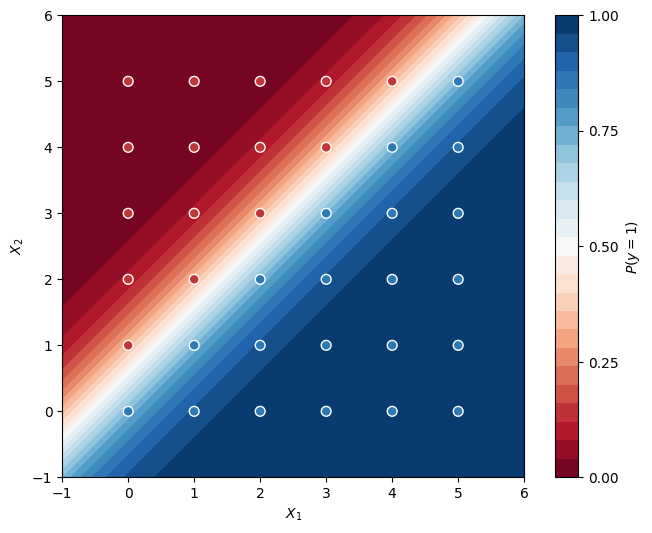

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X,y)
plot_decision_boundary(X, y, clf)

### Naive Bayes

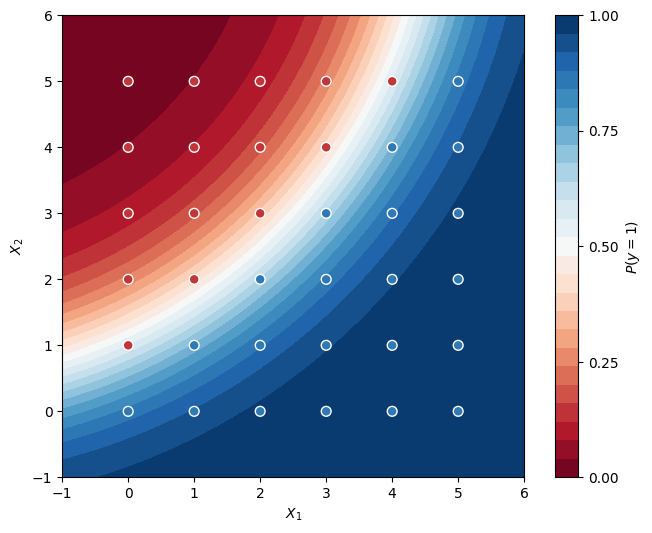

In [35]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X,y)
plot_decision_boundary(X, y, clf)

### SVM



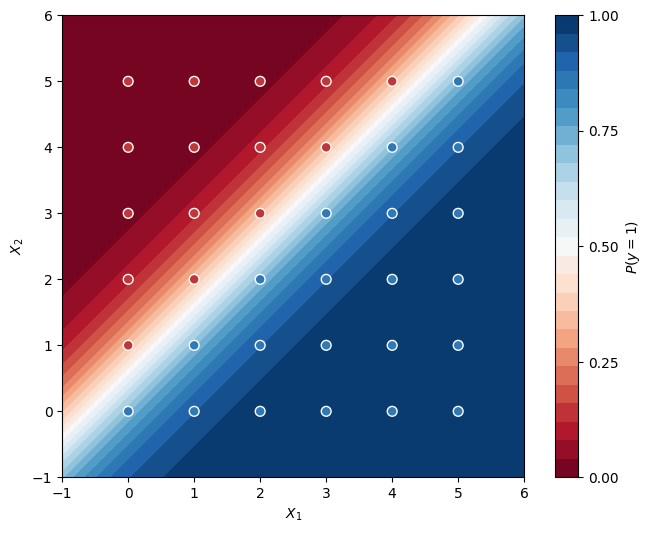

In [36]:
from sklearn.svm import SVC

clf = SVC(probability=True, kernel='linear').fit(X, y)
plot_decision_boundary(X, y, clf)

### Neural Network

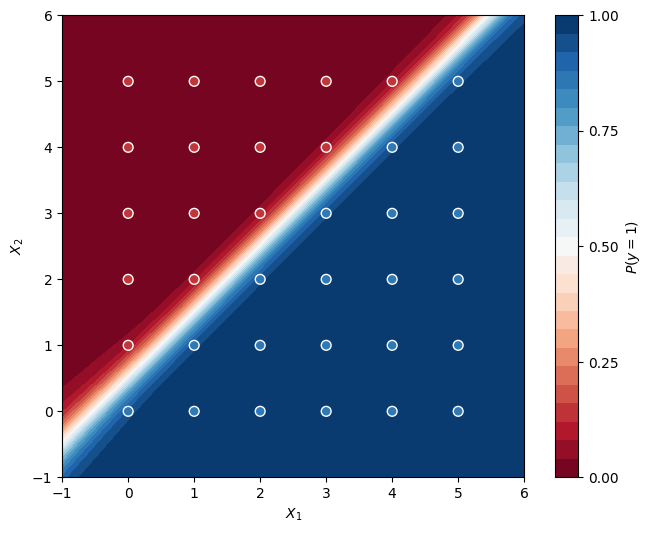

In [37]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=42, max_iter=2000).fit(X, y)
plot_decision_boundary(X, y, clf)

### KNN

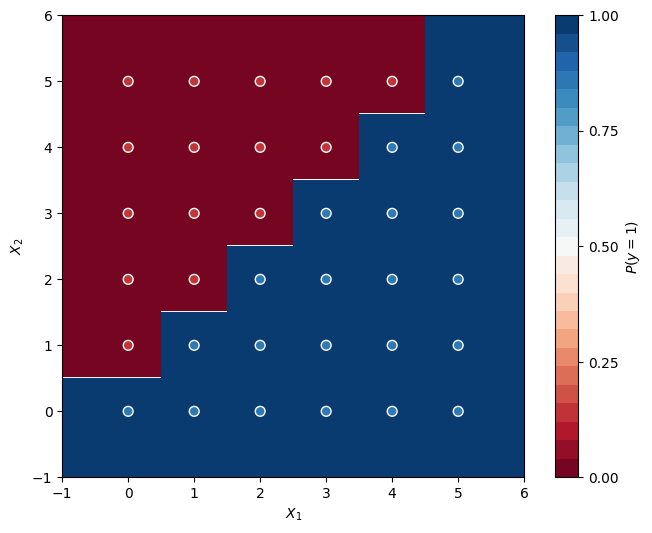

In [38]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1).fit(X, y)
plot_decision_boundary(X, y, clf)

### Decision Trees

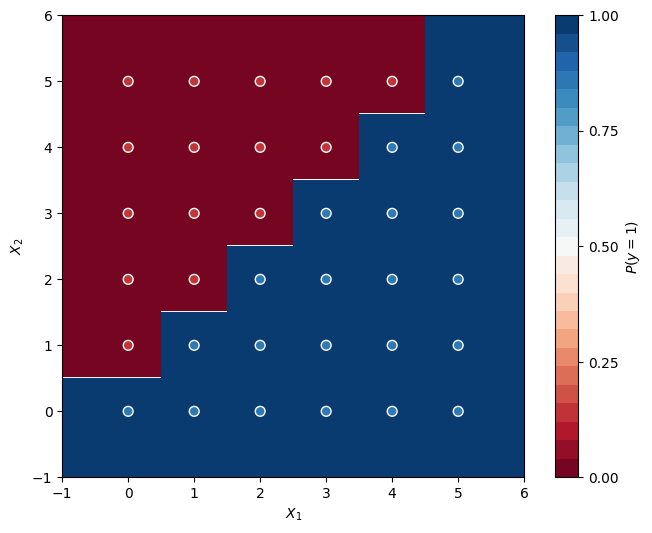

In [39]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X, y)
plot_decision_boundary(X, y, clf)

### Random Forest

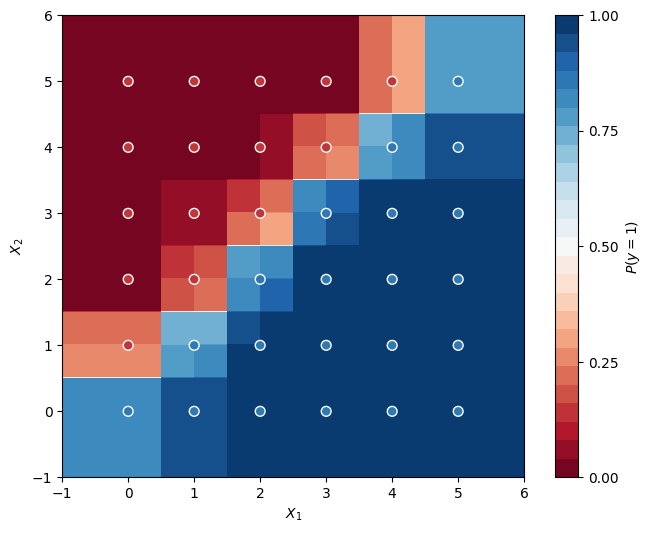

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0).fit(X,y)
plot_decision_boundary(X, y, clf)

### Gradient Boosting

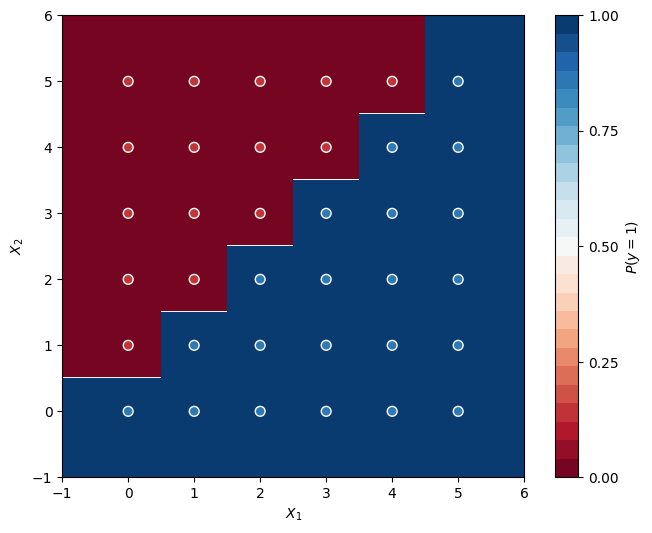

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0).fit(X,y)
plot_decision_boundary(X, y, clf)

### Voting Ensemble

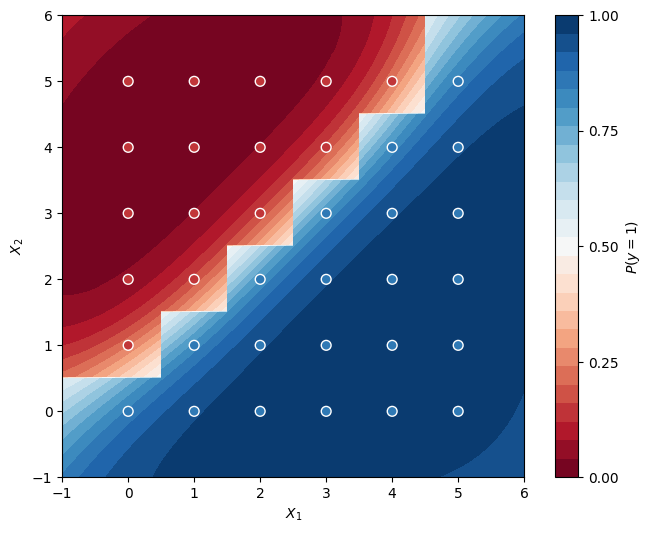

In [42]:
from sklearn.ensemble import VotingClassifier

c1 = LogisticRegression()
c2 = KNeighborsClassifier(n_neighbors=1)
c3 = SVC(probability=True, kernel='rbf')

clf = VotingClassifier([('lr', c1), ('nb', c2), ('svm', c3)], voting='soft').fit(X,y)
plot_decision_boundary(X, y, clf)

## Round Toy Dataset

In [55]:
# import dataset
df = pd.read_csv('../datasets/toy_dataset_02.csv')
# print the first rows of the dataset
df.head()

,X1,X2,Y
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,1
4,0,4,0


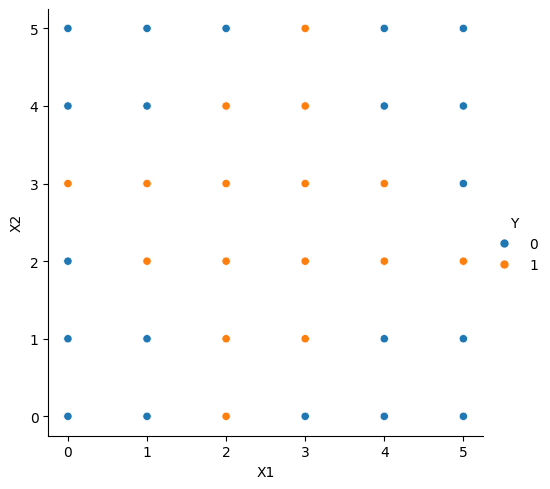

In [56]:
sns.relplot(x="X1", y="X2", hue="Y", data=df);

In [45]:
X = df[['X1', 'X2']].to_numpy()
y = df['Y'].to_numpy()

### Logistic Regression

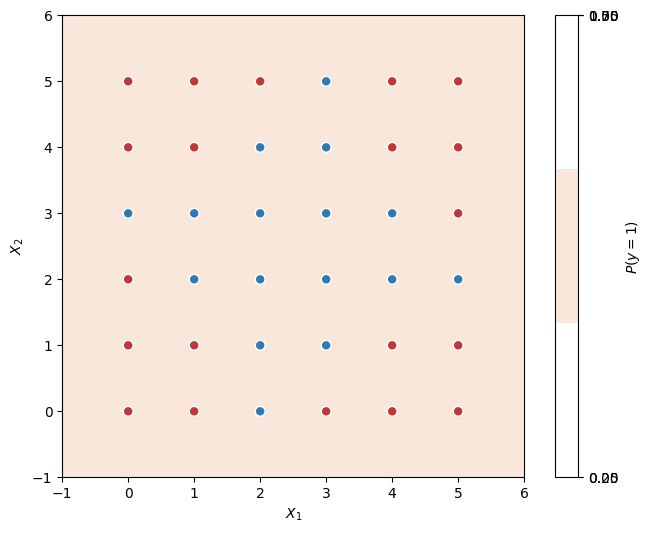

In [46]:
clf = LogisticRegression().fit(X,y)
plot_decision_boundary(X, y, clf)

### Naive Bayes

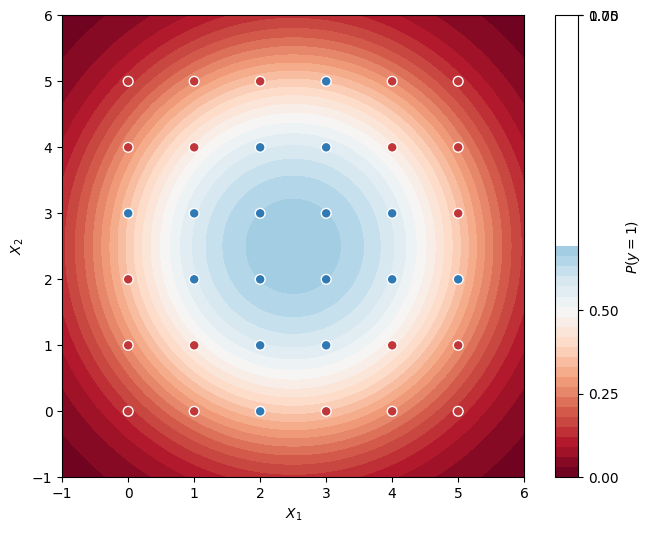

In [47]:
clf = GaussianNB().fit(X,y)
plot_decision_boundary(X, y, clf)

### SVM

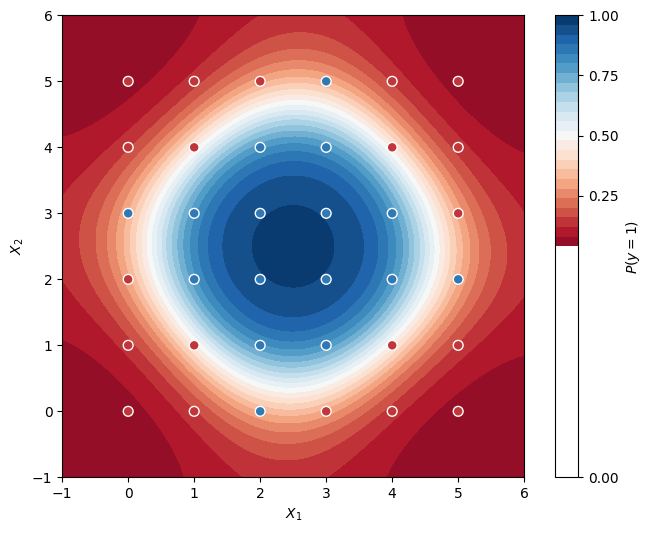

In [48]:
clf = SVC(probability=True, kernel='rbf').fit(X, y)
plot_decision_boundary(X, y, clf)

### Neural Network

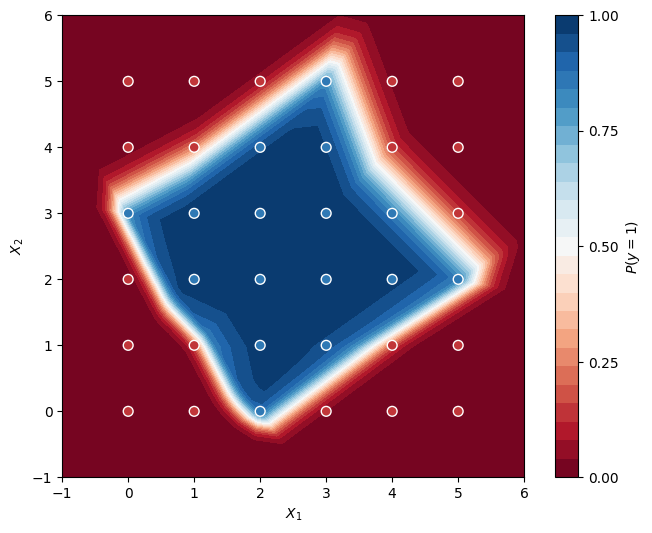

In [49]:
clf = MLPClassifier(random_state=7, max_iter=10000).fit(X, y)
plot_decision_boundary(X, y, clf)

### KNN

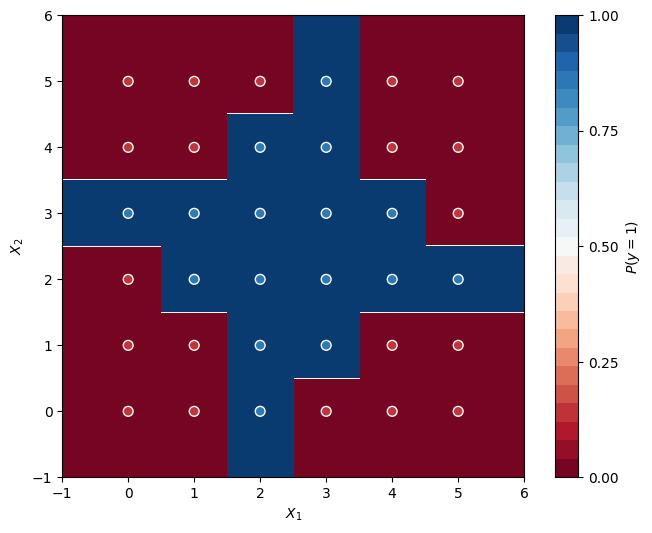

In [50]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X, y)
plot_decision_boundary(X, y, clf)

### Decision Trees

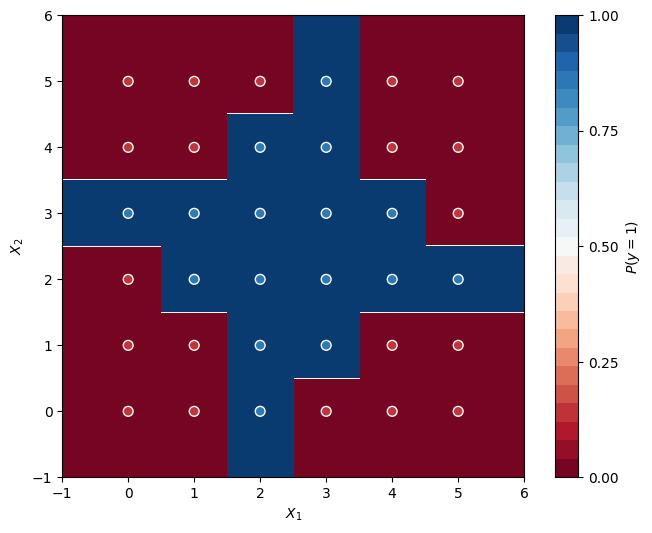

In [51]:
clf = DecisionTreeClassifier().fit(X, y)
plot_decision_boundary(X, y, clf)

### Random Forest

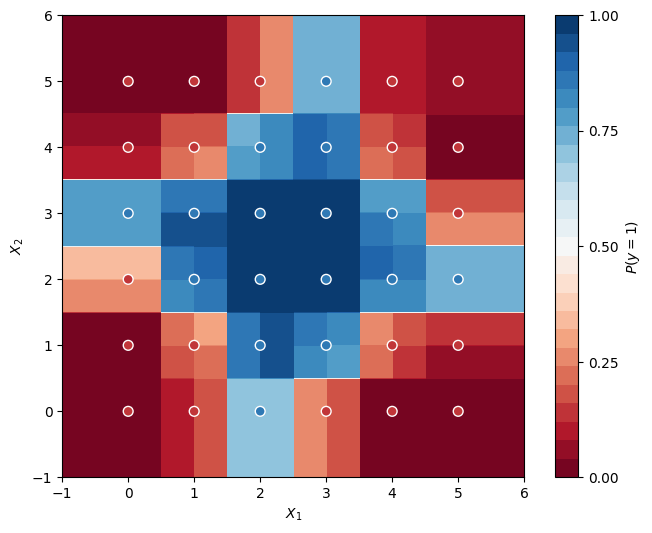

In [52]:
clf = RandomForestClassifier(random_state=0).fit(X,y)
plot_decision_boundary(X, y, clf)

### Gradient Boosting

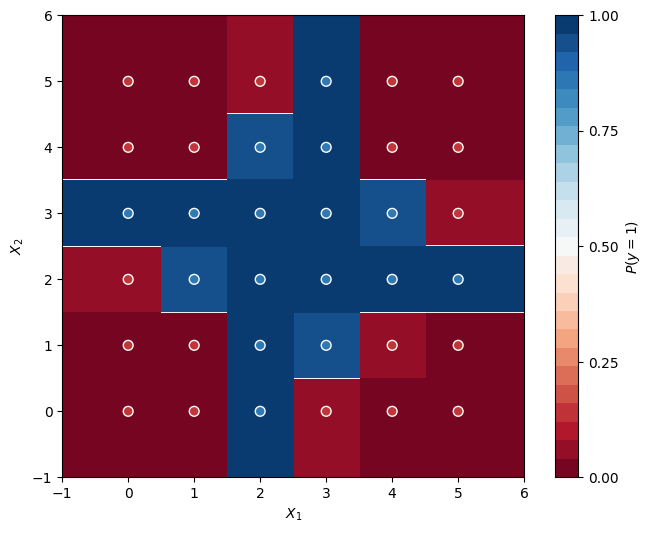

In [53]:
clf = GradientBoostingClassifier(random_state=0).fit(X,y)
plot_decision_boundary(X, y, clf)

### Voting Ensemble

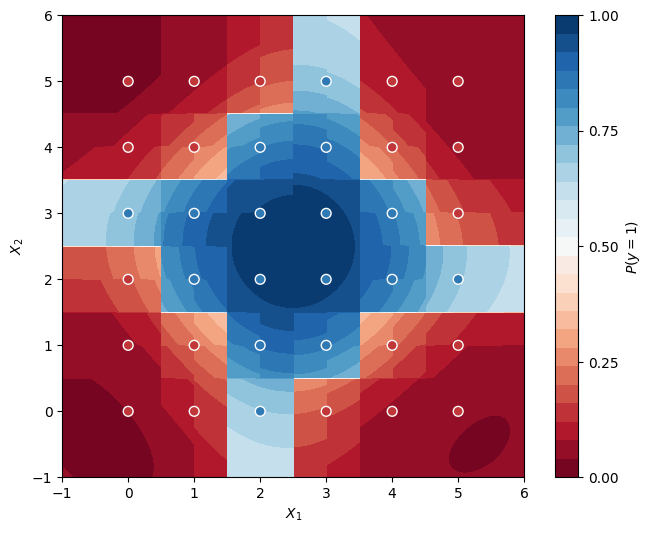

In [54]:
c1 = RandomForestClassifier(random_state=0)
c2 = KNeighborsClassifier(n_neighbors=1)
c3 = SVC(probability=True, kernel='rbf')

clf = VotingClassifier([('nn', c1), ('nb', c2), ('svm', c3)], voting='soft').fit(X,y)
plot_decision_boundary(X, y, clf)